In [1]:
# !pip install unidecode

In [10]:
import pandas as pd
import numpy as np
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import string
import time
from unidecode import unidecode

# 1. Import dữ liệu gốc + web scrapping

In [11]:
df = pd.read_csv('2_Reviews.csv', index_col=0)
df.head(10)

,User,Time,Rating,Comment,IDRestaurant
ID,,,,,
1,PHAN LE,20/12/2023 21:13,5.2,"Gà chiên còn sống, rất tanh. Khủng khiép",1
2,Thúy,25/9/2023 15:43,5.0,"Đã ăn qua rồi, ăn ok ạ",1
3,Quyên Quyên,24/6/2023 11:11,5.0,Đã thư rất ngon,1
4,Phương Thảo,22/12/2022 14:58,1.0,Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...,1
5,Quỳnh Nguyễn,23/9/2022 22:40,4.2,"21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...",1
6,Tien Le,15/9/2022 11:32,7.4,Nay có khuyến mại mua 1 tặng 1 trà kem sữa.\nU...,1
7,Anna,4/7/2022 1:31,1.0,Thề lâu lắm rồi t mới tức giận ntn . T có xem ...,1
8,Đinh Thuỵ Bích Vân,25/6/2022 20:13,10.0,Nếu đây là lần đầu bạn đến 4P thì nên thử 𝗛𝗮𝗹𝗳...,1
9,Huyen Nguyen,10/6/2022 12:43,1.0,Đặt giao combo C add thêm phô mai :15k - tính ...,1


In [12]:
df_1 = pd.read_csv('Review_scrapping.csv', index_col=0)
df_1.head(10)

,User,Time,Rating,Comment,IDRestaurant
ID,,,,,
29960,Loan Vỏ,28-02-2024 18:22,10,Do an ngon gia rẻ. Minh rất thích quan nay.se ...,1623
29961,tranthiet854ta,21-01-2024 12:05,10,Heo quay rất ngon...da giòn...cân đủ...giao hà...,1623
29962,Ẩn Danh,17-01-2024 21:20,10,"Giao hàng nhanh, đóng gói cẩn thận thịt nướng ...",1623
29963,baotran.74,6/1/2024 1:31,10,Hình ảnh mang tính chất nhận xu Đồ ăn ở đây ng...,1623
29964,K Vương Khang,31-12-2023 05:26,2,ít thịt toanf mỡ với da thôi,1623
29965,foodee_v0iwxt5i,12/12/2023 19:21,1,"Heo quay tệ nha, ko giông heo quay, giống kiểu...",1623
29966,ynnhiphanth265,28-11-2023 15:21,10,Quán làm nước chấm rất vừa miệng! Tuy nhiên th...,1623
29967,truongkieu1993,15-11-2023 13:56,8,Trên app đặt là lon mà khi giao là chai nhựa l...,1623
29968,Anh Dep Trai,14-10-2023 11:57,1,"Quá thất vọng, lần đầu ăn thấy ngon lần sau to...",1623


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29959 entries, 1 to 29959
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User          29959 non-null  object 
 1   Time          29959 non-null  object 
 2   Rating        29959 non-null  float64
 3   Comment       29958 non-null  object 
 4   IDRestaurant  29959 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 29960 to 30585
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User          626 non-null    object
 1   Time          626 non-null    object
 2   Rating        626 non-null    int64 
 3   Comment       626 non-null    object
 4   IDRestaurant  626 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 29.3+ KB


In [15]:
df_1[df_1.Rating == 'Ok']

,User,Time,Rating,Comment,IDRestaurant
ID,,,,,


In [16]:
df_1['Rating'] = df_1['Rating'].astype(float)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 29960 to 30585
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User          626 non-null    object 
 1   Time          626 non-null    object 
 2   Rating        626 non-null    float64
 3   Comment       626 non-null    object 
 4   IDRestaurant  626 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 29.3+ KB


In [17]:
# Concat 2 df and df_1:
df = pd.concat([df, df_1], ignore_index=True)
df

,User,Time,Rating,Comment,IDRestaurant
0,PHAN LE,20/12/2023 21:13,5.2,"Gà chiên còn sống, rất tanh. Khủng khiép",1
1,Thúy,25/9/2023 15:43,5.0,"Đã ăn qua rồi, ăn ok ạ",1
2,Quyên Quyên,24/6/2023 11:11,5.0,Đã thư rất ngon,1
3,Phương Thảo,22/12/2022 14:58,1.0,Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...,1
4,Quỳnh Nguyễn,23/9/2022 22:40,4.2,"21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...",1
...,...,...,...,...,...
30580,Ẩn Danh,14-03-2021 22:47,1.0,Có con sâu trong rau. Lần sau mong bếp rửa rau...,1625
30581,Ẩn Danh,12/3/2021 21:59,10.0,"Món ngon, sạch sẽ, giá tôtd. Hình ảnh mang tín...",1625
30582,Thùy Dung,1/3/2021 15:24,10.0,Đồ ăn ngon )))):):)):’djdkembdndkenendnxndjejj...,1625
30583,Ẩn Danh,23-02-2021 14:58,10.0,NG00000000000000000000NN? NNNNNNNNNNNNNNNNNNNN...,1625


# 2. Tiền xử lí dữ liệu


## 2.1 Loại bỏ các động từ chung

In [18]:
neutral_verb = ["đặt", "gọi","đi","ghé", "phục vụ", "nấu", "ăn", "uống", "dùng", "cắt ra", "nêm nếm", "giao", "pha", "mua"]
def remove_neutral_verbs(comment):
    for word in neutral_verb:
        comment = str(comment).replace(word, "")
    return comment

In [19]:
df['Comment_new'] = df['Comment'].apply(remove_neutral_verbs)

In [20]:
for item in df['Comment_new'].head():
    print("#######")
    print(item)

#######
Gà chiên còn sống, rất tanh. Khủng khiép
#######
Đã  qua rồi,  ok ạ
#######
Đã thư rất ngon
#######
Tệ ..  mang về cho 1 gói tương ớt. Và xin thêm không được. Khách ơ lại  thì tương free. Mua về thì lại phải  thêm tương. Nhưng phần  3 món. Cho 1 gói. Nvien không linh hoạt. Chuỗi lớn, còn thua cả một tiệm  nhỏ.
#######
21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn là chốt McDonal! Đang háo hức vì 2 đứa nó vừa  vừa khen lấy khen để, vậy mà nỡ lòng nào đến lượt mình nó lại thành ra thế này😭😭😭Cơm sống toàn tập,  cơm mà cứ như nhai gạo...ức chịu ko nổi😤😤😤


## 2.2 Load danh sách emoji

In [21]:
## LOAD EMOJICON
file = open('files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
#print(teen_dict)
file.close()


In [22]:
emoji_dict

{'❤': 'yêu',
 '👍': 'thích',
 '😍': 'cười',
 '😊': 'cười',
 '😘': 'cười',
 '🥰': 'cười',
 '😁': 'cười',
 '😤': 'tức',
 '👌': 'thích',
 '⭐': 'thích',
 '🌟': 'thích',
 '♥': 'yêu',
 '☺': 'cười',
 '😂': 'cười',
 '😀': 'cười',
 '💕': 'yêu',
 '😗': 'thích',
 '🤗': 'cười',
 '😉': 'cười',
 '😃': 'cười',
 '👏': 'chúc mừng',
 '😄': 'cười',
 '😋': 'cười',
 '🤩': 'cười',
 '🙂': 'cười',
 '🤣': 'cười',
 '👎': 'tệ',
 '😆': 'cười',
 '💖': 'yêu',
 '😡': 'giận dữ',
 '😎': 'cười',
 '😚': 'thích',
 '💚': 'yêu',
 '😙': 'thích',
 '💙': 'yêu',
 '💛': 'yêu',
 '😓': 'bùn',
 '😢': 'khóc',
 '😭': 'khóc ròng',
 '☹': 'bùn',
 '😫': 'mệt mỏi',
 '💗': 'yêu',
 '🖤': 'yêu',
 '😣': 'giận dữ',
 '🧡': 'yêu'}

## 2.3 Load danh sách teencode

In [23]:

file = open('files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
#print(teen_dict)
file.close()


In [24]:
teen_dict

{'ctrai': 'con trai',
 'khôg': 'không',
 'bme': 'bố mẹ',
 'cta': 'chúng ta',
 'mih': 'mình',
 'mqh': 'mối quan hệ',
 'cgai': 'con gái',
 'nhữg': 'những',
 'mng': 'mọi người',
 'svtn': 'sinh viên tình nguyện',
 'qtam': 'quan tâm',
 'thươg': 'thương',
 'qtâm': 'quan tâm',
 'chug': 'chung',
 'trườg': 'trường',
 'thoy': 'thôi',
 'đki': 'đăng ký',
 'atsm': 'ảo tưởng sức mạnh',
 'ạk': 'ạ',
 'vch': 'vãi chưởng',
 'cùg': 'cùng',
 'pn': 'bạn',
 'pjt': 'biết',
 'thjk': 'thích',
 'keke': 'ce ce',
 'ktra': 'kiểm tra',
 'nek': 'nè',
 'cgái': 'con gái',
 'nthe': 'như thế',
 'chúg': 'chúng',
 'kái': 'cái',
 'tìh': 'tình',
 'phòg': 'phòng',
 'lòg': 'lòng',
 'từg': 'từng',
 'rằg': 'rằng',
 'sốg': 'sống',
 'thuj': 'thôi',
 'thuơng': 'thương',
 'càg': 'càng',
 'đky': 'đăng ký',
 'bằg': 'bằng',
 'sviên': 'sinh viên',
 'ák': 'á',
 'đág': 'đáng',
 'nvay': 'như vậy',
 'nhjeu': 'nhiều',
 'xg': 'xuống',
 'zồi': 'rồi',
 'trag': 'trang',
 'zữ': 'dữ',
 'atrai': 'anh trai',
 'kte': 'kinh tế',
 'độg': 'động',
 'lmh

## 2.3 Load danh sách các từ tiếng anh -> Việt

In [25]:

file = open('files/english-vnmese.txt', 'r', encoding="utf8")
englist_lst = file.read().split('\n')
for line in englist_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()



In [26]:
teen_dict

{'ctrai': 'con trai',
 'khôg': 'không',
 'bme': 'bố mẹ',
 'cta': 'chúng ta',
 'mih': 'mình',
 'mqh': 'mối quan hệ',
 'cgai': 'con gái',
 'nhữg': 'những',
 'mng': 'mọi người',
 'svtn': 'sinh viên tình nguyện',
 'qtam': 'quan tâm',
 'thươg': 'thương',
 'qtâm': 'quan tâm',
 'chug': 'chung',
 'trườg': 'trường',
 'thoy': 'thôi',
 'đki': 'đăng ký',
 'atsm': 'ảo tưởng sức mạnh',
 'ạk': 'ạ',
 'vch': 'vãi chưởng',
 'cùg': 'cùng',
 'pn': 'bạn',
 'pjt': 'biết',
 'thjk': 'thích',
 'keke': 'ce ce',
 'ktra': 'kiểm tra',
 'nek': 'nè',
 'cgái': 'con gái',
 'nthe': 'như thế',
 'chúg': 'chúng',
 'kái': 'cái',
 'tìh': 'tình',
 'phòg': 'phòng',
 'lòg': 'lòng',
 'từg': 'từng',
 'rằg': 'rằng',
 'sốg': 'sống',
 'thuj': 'thôi',
 'thuơng': 'thương',
 'càg': 'càng',
 'đky': 'đăng ký',
 'bằg': 'bằng',
 'sviên': 'sinh viên',
 'ák': 'á',
 'đág': 'đáng',
 'nvay': 'như vậy',
 'nhjeu': 'nhiều',
 'xg': 'xuống',
 'zồi': 'rồi',
 'trag': 'trang',
 'zữ': 'dữ',
 'atrai': 'anh trai',
 'kte': 'kinh tế',
 'độg': 'động',
 'lmh

## 2.4 Giữ lại các tính từ trọng tâm

In [27]:

positive_words = [
    "Tuyệt", "Ngon", "Tốt", "Sạch", "Hấp dẫn", "Sang trọng", "Giá cả",
    "Thân thiện", "Đa dạng", "Đặc biệt", "Lịch sự", "Ấm cúng", 
    "Nổi bật", "Sáng tạo", "Chất lượng", "Thú vị", "Hợp lý", "Thuận tiện", 
    "Thơm ngon", "Tươi ngon", "Độc đáo", "Phong phú",
      "Hòa quyện", "Đậm đà", "Mềm mại", "Giòn ngon",
    "Đậm vị", "Sống động", "Lạ miệng", "Tinh tế", "Săn chắc", "Mát lạnh"
    "thích", "tốt", "xuất sắc", "tuyệt vời", "tuyệt hảo", "đẹp", "ổn",
    "hài lòng", "ưng ý", "hoàn hảo", "chất lượng", "thú vị", "nhanh",
    "tiện lợi", "dễ sử dụng", "hiệu quả", "ấn tượng",
    "nổi bật", "tận hưởng",  "thân thiện", 
    "gợi cảm", "tươi mới", "lạ mắt", "cao cấp", "độc đáo",
    "hợp khẩu vị", "rất tốt", "rất thích", "đáng tin cậy", "đẳng cấp",
    "an tâm", "không thể cưỡng lại", "thỏa mãn", "thúc đẩy",
    "cảm động", "phục vụ tốt", "làm hài lòng", "gây ấn tượng", "nổi trội",
    "sáng tạo", "quý báu", "phù hợp", "tận tâm",
    "hiếm có", "cải thiện", "hoà nhã", "chăm chỉ", "cẩn thận",
    "vui vẻ", "sáng sủa", "hào hứng", "đam mê", "vừa vặn", "đáng tiền"
]

negative_words = [
    "tanh", "hôi","thối", "thối rửa", "lên mốc", "khó ăn", "nhạt", "nhạt nhẽo","lạc", "mặn", "chua","kém", "tệ", "đau", "xấu", "dở", "ức",
    "buồn", "rối", "thô", "lâu", "chán", "cứng", "cứng ngắt", "mắc", "đắt", "đắt tiền", "mắc tiền", "chua", "chát","chua chát",
    "tối", "chán", "ít", "mờ", "mỏng", "ghê", "tởm", "gớm", "ghê tởm", "ói", "khô",
    "lỏng lẻo", "khó", "cùi", "yếu",
    "kém chất lượng", "không thích", "không thú vị", "không ổn",
    "không hợp", "không đáng tin cậy", "không chuyên nghiệp",
    "không phản hồi", "không an toàn", "không phù hợp", "không thân thiện", "không linh hoạt", "không đáng giá",
    "không ấn tượng", "không tốt", "chậm", "khó khăn", "phức tạp",
    "khó hiểu", "khó chịu", "gây khó dễ", "rườm rà", "khó truy cập",
    "thất bại", "tồi tệ", "khó xử", "không thể chấp nhận", "tồi tệ","không rõ ràng",
    "không chắc chắn", "rối rắm", "không tiện lợi", "không đáng tiền", "chưa đẹp", "không đẹp"
]

# Function to remove spaces, tone markers, and convert to lowercase
def transform_word(word):
    word_without_space = word.replace(" ", "")
    word_without_tone_markers = unidecode(word_without_space)
    lowercase_word = word_without_tone_markers.lower()
    return lowercase_word

# Combine both lists
combined_list = positive_words + negative_words

# Create a new list with removed spaces, tone markers, and converted to lowercase
adj_retain_list = [transform_word(word) for word in combined_list]



In [28]:
print(adj_retain_list)

['tuyet', 'ngon', 'tot', 'sach', 'hapdan', 'sangtrong', 'giaca', 'thanthien', 'dadang', 'dacbiet', 'lichsu', 'amcung', 'noibat', 'sangtao', 'chatluong', 'thuvi', 'hoply', 'thuantien', 'thomngon', 'tuoingon', 'docdao', 'phongphu', 'hoaquyen', 'damda', 'memmai', 'gionngon', 'damvi', 'songdong', 'lamieng', 'tinhte', 'sanchac', 'matlanhthich', 'tot', 'xuatsac', 'tuyetvoi', 'tuyethao', 'dep', 'on', 'hailong', 'ungy', 'hoanhao', 'chatluong', 'thuvi', 'nhanh', 'tienloi', 'desudung', 'hieuqua', 'antuong', 'noibat', 'tanhuong', 'thanthien', 'goicam', 'tuoimoi', 'lamat', 'caocap', 'docdao', 'hopkhauvi', 'rattot', 'ratthich', 'dangtincay', 'dangcap', 'antam', 'khongthecuonglai', 'thoaman', 'thucday', 'camdong', 'phucvutot', 'lamhailong', 'gayantuong', 'noitroi', 'sangtao', 'quybau', 'phuhop', 'tantam', 'hiemco', 'caithien', 'hoanha', 'chamchi', 'canthan', 'vuive', 'sangsua', 'haohung', 'damme', 'vuavan', 'dangtien', 'tanh', 'hoi', 'thoi', 'thoirua', 'lenmoc', 'khoan', 'nhat', 'nhatnheo', 'lac', '

## 2.5 Load danh sách các từ ghi sai, đồng thời bỏ các tính từ trọng tâm khỏi danh sách này

In [29]:
with open('files/wrong-word.txt', 'r', encoding="utf8") as file:
    wrong_lst = file.read().split('\n')

# Remove any empty strings from wrong_lst
wrong_lst = [word for word in wrong_lst if word]

# Exclude words from new_list that are also present in wrong_lst
new_wrong_lst = [word for word in wrong_lst if word not in adj_retain_list]



In [30]:
print(new_wrong_lst)

['aud', 'se', 'gd', 'tz', 'voi', 'hoa', 'cca', 'bay', 'son', 'vtd', 'tau', 'xd', 'tam', 'lun', 'hua', 'tia', 'vnd', 'anh', 'pro', 'sim', 'yen', 'x', 'co', 'fo', 'si', 'h', 'tue', 'oxy', 'qua', 'fan', 'ne', 'ca', 'vc', 'nga', 'ki', 'sau', 'wan', 'kng', 'mau', 'yum', 'k', 'gee', 'yhd', 'li', 'xe', 'pa', 'ann', 'nhg', 'vv', 'bx', 'cf', 'spa', 'hy', 't', 'zi', 's', 'eta', 'vui', 'ha', 'duy', 'nv', 'ar', 'oct', 'mik', 'p', 'ny', 'bia', 'ba', 'clo', 'ron', 'cai', 'lai', 'vtv', 'na', 'hm', 'ish', 'm', 'ac', 'cd', 'mod', 'nag', 'cam', 'be', 'lew', 'tt', 'cha', 'rem', 'tri', 'ci', 'sai', 'cm', 'apx', 'leu', 'klm', 'yt', 'dao', 'tuy', 'hk', 'q', 'boa', 'rin', 'pq', 'dac', 'ggg', 'ps', 'dn', 'noi', 'cat', 'hoe', 'ok', 'tru', 'atm', 'thy', 'd', 'id', 'vay', 'abc', 'oke', 'pax', 'ms', 'fom', 'dee', 'sam', 'gon', 'cuz', 'til', 'chi', 'hhh', 'mai', 'xx', 'jen', 'ntn', 'in', 'chg', 'khu', 'mc', 'z', 'bel', 'tl', 'str', 'tat', 'wow', 'gin', 'xoa', 'n', 'sac', 'oh', 'ned', 'tim', 'ht', 'flc', 'msy', 'eo

## 2.6 Xử lí dữ liệu dựa vào các danh sách đã được load

In [31]:
def process_text(text, dict_emoji, dict_teen, lst_wrong):
    document = text.lower()
    document = document.replace("’",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document): # hàm senttokenize của lib undersea: mỗi dấu chấm phân tách thành 2 câu
        # if not(sentence.isascii()):
        ###### CONVERT EMOJICON
        sentence = ''.join(' '+ dict_emoji[char]+' ' if char in dict_emoji else char for char in list(sentence))
        ###### CONVERT TEENCODE
        sentence = ' '.join(dict_teen[word] if word in dict_teen else word for word in sentence.split())
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        ###### DEL wrong words   
        sentence = ' '.join('' if word in lst_wrong else word for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '                    
    document = new_sentence  
    #print(document)
     ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [32]:
start_time = time.time()
df['Comment_new'] = df['Comment'].apply(lambda x: process_text(str(x), emoji_dict, teen_dict, new_wrong_lst))
end_time = time.time()
# Calculate the duration
duration = end_time - start_time

if duration < 60:
    print(f"Time taken to process process_text func: {duration} seconds")
else:
    minutes = duration / 60
    print(f"Time taken to process process_text func: {minutes} minutes")

Time taken to process process_text func: 4.8137850602467855 minutes


In [33]:
for item in df['Comment'].head():
    print("#######")
    print(item)

#######
Gà chiên còn sống, rất tanh. Khủng khiép
#######
Đã ăn qua rồi, ăn ok ạ
#######
Đã thư rất ngon
#######
Tệ .. mua mang về cho 1 gói tương ớt. Và xin thêm không được. Khách ơ lại ăn thì tương free. Mua về thì lại phải mua thêm tương. Nhưng phần ăn 3 món. Cho 1 gói. Nvien không linh hoạt. Chuỗi lớn, còn thua cả một tiệm ăn nhỏ.
#######
21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn là chốt McDonal! Đang háo hức vì 2 đứa nó vừa ăn vừa khen lấy khen để, vậy mà nỡ lòng nào đến lượt mình nó lại thành ra thế này😭😭😭Cơm sống toàn tập, ăn cơm mà cứ như nhai gạo...ức chịu ko nổi😤😤😤


## 2.7 Xử lí unicode

In [34]:
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [35]:
start_time = time.time()
df['Comment_new'] = df['Comment_new'].apply(lambda x: covert_unicode(str(x)))
end_time = time.time()
# Calculate the duration
duration = end_time - start_time

if duration < 60:
    print(f"Time taken to process covert_unicode func: {duration} seconds")
else:
    minutes = duration / 60
    print(f"Time taken to process covert_unicode func: {minutes} minutes")

Time taken to process covert_unicode func: 2.3392059803009033 seconds


In [36]:
for item in df['Comment_new'].head():
    print("#######")
    print(item)

#######
gà chiên còn sống rất tanh. khủng khiép.
#######
đã ăn rồi ăn đồng ý ạ.
#######
đã thư rất ngon.
#######
tệ. về cho gói tương ớt. và thêm không được. khách ơ lại ăn thì tương . về thì lại phải thêm tương. nhưng phần ăn món. cho gói. không hoạt. chuỗi lớn còn thừa cả một tiệm ăn nhỏ.
#######
đứa nhỏ kêu đói hồi bình loạn là chốt . đang háo hức vì đứa nó vừa ăn vừa ngợi lấy ngợi để vậy mà nỡ lòng nào đến lượt mình nó lại thành thế này khóc ròng khóc ròng khóc ròng cơm sống toàn tập ăn cơm mà cứ như gạo ức chịu không nổi tức tức tức.


## 2.8 Xử lí loại bỏ các từ có chữ cái trùng lặp: tuyetttt voiiii -> tuyet voi, ....

In [37]:
import re

# Define the function to normalize repeated characters in a text
def normalize_repeated_characters(text):
    # Substitute any consecutive repeated characters with a single instance of that character
    return re.sub(r'(.)\1+', r'\1', text)

In [38]:
start_time = time.time()
df['Comment_new'] = df['Comment_new'].apply(lambda x: normalize_repeated_characters(str(x)))
end_time = time.time()
# Calculate the duration
duration = end_time - start_time

if duration < 60:
    print(f"Time taken to process normalize_repeated_characters func: {duration} seconds")
else:
    minutes = duration / 60
    print(f"Time taken to process normalize_repeated_characters func: {minutes} minutes")


Time taken to process normalize_repeated_characters func: 0.39763808250427246 seconds


In [39]:
for item in df['Comment_new'].head():
    print("#######")
    print(item)

#######
gà chiên còn sống rất tanh. khủng khiép.
#######
đã ăn rồi ăn đồng ý ạ.
#######
đã thư rất ngon.
#######
tệ. về cho gói tương ớt. và thêm không được. khách ơ lại ăn thì tương . về thì lại phải thêm tương. nhưng phần ăn món. cho gói. không hoạt. chuỗi lớn còn thừa cả một tiệm ăn nhỏ.
#######
đứa nhỏ kêu đói hồi bình loạn là chốt . đang háo hức vì đứa nó vừa ăn vừa ngợi lấy ngợi để vậy mà nỡ lòng nào đến lượt mình nó lại thành thế này khóc ròng khóc ròng khóc ròng cơm sống toàn tập ăn cơm mà cứ như gạo ức chịu không nổi tức tức tức.


## 2.9 Xử lí post_tag

In [40]:
def process_special_word(text):
    new_text = ''
    text_lst = text.split()
    i= 0
    if 'không' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == 'không':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()

In [41]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['A','AB','V','VB','VY','R']
        sentence = ' '.join( word[0] if word[1].upper() in lst_word_type else '' for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [42]:
start_time = time.time()
df['Comment_new'] = df['Comment_new'].apply(lambda x: process_postag_thesea(str(x)))
end_time = time.time()
# Calculate the duration
duration = end_time - start_time

if duration < 60:
    print(f"Time taken to process process_postag_thesea func: {duration} seconds")
else:
    minutes = duration / 60
    print(f"Time taken to process process_postag_thesea func: {minutes} minutes")

Time taken to process process_postag_thesea func: 9.010438092549641 minutes


In [43]:
for item in df['Comment_new'].head():
    print("#######")
    print(item)

#######
chiên còn sống rất tanh
#######
đã ăn ăn
#######
đã rất ngon
#######
về thêm ơ lại ăn về lại phải thêm ăn lớn còn thừa ăn nhỏ
#######
kêu đói là đang háo_hức vừa ăn vậy_mà lại thành khóc ròng khóc ròng khóc sống toàn_tập ăn cứ chịu không_nổi_tức tức


## 2.10 Xử lí loại bỏ các từ stopword

In [44]:
def remove_stopword(text, stopwords):
    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [45]:
#LOAD STOPWORDS
file = open('files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [46]:
start_time = time.time()
df['Comment_new'] = df['Comment_new'].apply(lambda x: remove_stopword(str(x), stopwords_lst))
# Calculate the duration
duration = end_time - start_time

print(f"Time taken: {duration} seconds")

Time taken: -0.06632065773010254 seconds


In [47]:
for item in df['Comment_new'].head():
    print("#######")
    print(item)

#######
chiên sống
#######

#######
ngon
#######
thừa
#######
kêu đói háo_hức thành khóc ròng khóc ròng khóc sống toàn_tập không_nổi_tức tức


## 2.10 Xử lí loại bỏ các row trùng và row chứa dữ liệu null

In [48]:
df

,User,Time,Rating,Comment,IDRestaurant,Comment_new
0,PHAN LE,20/12/2023 21:13,5.2,"Gà chiên còn sống, rất tanh. Khủng khiép",1,chiên sống
1,Thúy,25/9/2023 15:43,5.0,"Đã ăn qua rồi, ăn ok ạ",1,
2,Quyên Quyên,24/6/2023 11:11,5.0,Đã thư rất ngon,1,ngon
3,Phương Thảo,22/12/2022 14:58,1.0,Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...,1,thừa
4,Quỳnh Nguyễn,23/9/2022 22:40,4.2,"21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...",1,kêu đói háo_hức thành khóc ròng khóc ròng khóc...
...,...,...,...,...,...,...
30580,Ẩn Danh,14-03-2021 22:47,1.0,Có con sâu trong rau. Lần sau mong bếp rửa rau...,1625,lừa mong rửa_kỉ điện_thoại đừng phá nuôi lừa c...
30581,Ẩn Danh,12/3/2021 21:59,10.0,"Món ngon, sạch sẽ, giá tôtd. Hình ảnh mang tín...",1625,ngon sạch_sẽ
30582,Thùy Dung,1/3/2021 15:24,10.0,Đồ ăn ngon )))):):)):’djdkembdndkenendnxndjejj...,1625,
30583,Ẩn Danh,23-02-2021 14:58,10.0,NG00000000000000000000NN? NNNNNNNNNNNNNNNNNNNN...,1625,


In [49]:
df.shape

(30585, 6)

In [50]:
df.duplicated().any() # Có dữ liệu trùng

True

In [51]:
df_without_duplicates = df.drop_duplicates()
df_without_duplicates.shape

(30532, 6)

In [52]:
df_clean = df_without_duplicates.dropna(subset=["Comment_new"])
df_clean.shape

(30532, 6)

In [53]:
# Filter out rows where 'Comment_new' is not an empty string
df_clean = df_clean[df_clean['Comment_new'] != ""]

df_clean.reset_index(drop=True, inplace=True)
df_clean.shape

(29917, 6)

## 2.11 Tạo bucket phân loại cho cột Rating

In [54]:
from sklearn.preprocessing import LabelEncoder
# Define the bins and labels

bins = [0.0, 4.0,  6.0, 10.0]
labels = ['Negative', 'Neutral', 'Positive']

# Add a new column with the ratings classification
df_clean['rating_class'] = pd.cut(df_clean['Rating'], bins=bins, labels=labels, include_lowest=True)

# Use LabelEncoder to encode the categorical labels into numerical values
label_encoder = LabelEncoder()
df_clean['rating_encoded'] = label_encoder.fit_transform(df_clean['rating_class'])



In [55]:
df_clean.shape

(29917, 8)

In [56]:
df_clean.rating_class.value_counts()

Positive    22094
Neutral      4116
Negative     3707
Name: rating_class, dtype: int64

In [57]:
df_clean.rating_encoded.value_counts()

2    22094
1     4116
0     3707
Name: rating_encoded, dtype: int64

# 3. Lưu dữ liệu về 1 file csv

In [58]:
df_clean = df_clean[["IDRestaurant","Comment_new", "rating_encoded"]]
df_clean.to_csv('Reviews_preprocessed.csv', index=False)

# 4 Khám phá dữ liệu

In [87]:
df_clean = pd.read_csv('Reviews_preprocessed.csv')
df_restaurant = pd.read_csv('1_Restaurants.csv')
df_restaurant_scrapping = pd.read_csv('Restaurant_scrapping.csv')

### 4.1 Đọc dữ liệu đã xử lí

In [88]:
df_clean

,IDRestaurant,Comment_new,rating_encoded
0,1,chiên sống,1
1,1,ngon,1
2,1,thừa,0
3,1,kêu đói háo_hức thành khóc ròng khóc ròng khóc...,1
4,1,tặng uống,2
...,...,...,...
29912,1625,ngon skdkdjabgkflagshjxjozn bzokzbzjznb đào,2
29913,1625,góp,2
29914,1625,lừa mong rửa_kỉ điện_thoại đừng phá nuôi lừa c...,0
29915,1625,ngon sạch_sẽ,2


In [89]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29917 entries, 0 to 29916
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IDRestaurant    29917 non-null  int64 
 1   Comment_new     29917 non-null  object
 2   rating_encoded  29917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 701.3+ KB


### 4.2 Đọc dữ liệu danh sách restaurant

In [90]:
df_restaurant

,ID,Restaurant,Address,Time,Price,District
0,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
1,2,Cháo Trắng - Cháo Thịt Bằm BK House - Phạm Viế...,"112B Phạm Viết Chánh, P. Nguyễn Cư Trinh, Quận...",00:00 - 23:59,5.000 - 40.000,Quận 1
2,3,Texas Chicken - Nguyễn Thái Học,"115 Nguyễn Thái Học , Quận 1, TP. HCM",NaN,30.000 - 300.000,Quận 1
3,4,Bếp Chay 365,"Tầng 1, 35 Nguyễn Văn Tráng, P. Bến Thành, Quậ...",NaN,15.000 - 50.000,Quận 1
4,5,Bánh Canh Cua Linh,"80A Điện Biên Phủ, P. Đa Kao, Quận 1, TP. HCM",06:20 - 22:00,25.000 - 35.000,Quận 1
...,...,...,...,...,...,...
1617,1618,Món Ăn Miền Trung - Thắng Lợi,"180/1C Tô Ký - Khu Phố 2, P. Tân Chánh Hiệp, Q...",NaN,19.000 - 79.000,Quận 12
1618,1619,Bánh Mì Bò Nướng Cô Ba - Hiệp Thành 17,"284 Hiệp Thành 17, P. Hiệp Thành, Quận 12, TP....",05:30 - 21:00,0 - 0,Quận 12
1619,1620,Anh Anh Quán - Cơm Tấm Sườn Ốp La & Bún Thịt N...,"89 Trương Thị Hoa, P. Tân Thới Hiệp, Quận 12, ...",NaN,30.000 - 36.000,Quận 12
1620,1621,Phú Mập - Cháo Lòng - Lê Văn Khương,"756 Lê Văn Khương, P. Thới An, Quận 12, TP. HCM",NaN,0 - 0,Quận 12


In [91]:
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1622 non-null   int64 
 1   Restaurant  1622 non-null   object
 2   Address     1622 non-null   object
 3   Time        773 non-null    object
 4   Price       1622 non-null   object
 5   District    1622 non-null   object
dtypes: int64(1), object(5)
memory usage: 76.2+ KB


In [92]:
df_restaurant_scrapping

,ID,Restaurant,Address,Time,Price
0,1623,Lò Quay Sài Gòn - Cách Mạng Tháng 8,"50/2 Cách Mạng Tháng 8, P. An Thạnh , Thị Xã T...",05:00 - 23:30,130.000đ - 1.100.000
1,1624,NEM NƯỚNG THANH THẢO - Nem Nướng & Bún Thịt Nư...,"67 Đường D1 Khu Dân Cư Phú Hoà, P. Phú Hòa, Th...",06:30 - 22:00,0 - 0
2,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa - Đại Lộ Bì...,"492 Đường D1, P. Phú Hòa, Thành Phố Thủ Dầu Mộ...",09:00 - 22:00,40000 - 70000


In [93]:
df_restaurant_scrapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          3 non-null      int64 
 1   Restaurant  3 non-null      object
 2   Address     3 non-null      object
 3   Time        3 non-null      object
 4   Price       3 non-null      object
dtypes: int64(1), object(4)
memory usage: 248.0+ bytes


In [94]:
df_restaurant = pd.concat([df_restaurant, df_restaurant_scrapping], ignore_index=True)


In [95]:
df_restaurant.tail(10)

,ID,Restaurant,Address,Time,Price,District
1615,1616,Bếp Nhà Hai - Pizza Hamburger - Trần Thị Cờ,"297 Trần Thị Cờ, P. Thới An, Quận 12, TP. HCM",07:00 - 19:30,30.000 - 100.000,Quận 12
1616,1617,Quán 99 - Cơm Tấm & Bún Mắm,"605 Nguyễn Ảnh Thủ, P. Hiệp Thành, Quận 12, TP...",00:00 - 23:59,0 - 0,Quận 12
1617,1618,Món Ăn Miền Trung - Thắng Lợi,"180/1C Tô Ký - Khu Phố 2, P. Tân Chánh Hiệp, Q...",NaN,19.000 - 79.000,Quận 12
1618,1619,Bánh Mì Bò Nướng Cô Ba - Hiệp Thành 17,"284 Hiệp Thành 17, P. Hiệp Thành, Quận 12, TP....",05:30 - 21:00,0 - 0,Quận 12
1619,1620,Anh Anh Quán - Cơm Tấm Sườn Ốp La & Bún Thịt N...,"89 Trương Thị Hoa, P. Tân Thới Hiệp, Quận 12, ...",NaN,30.000 - 36.000,Quận 12
1620,1621,Phú Mập - Cháo Lòng - Lê Văn Khương,"756 Lê Văn Khương, P. Thới An, Quận 12, TP. HCM",NaN,0 - 0,Quận 12
1621,1622,长鲍鱼 Trường Bào Ngư - Súp Bào Ngư Vi Cá Tẩm Bổ ...,"290/30/06 HT17, P. Hiệp Thành, Quận 12, TP. HCM",07:30 - 21:30,0 - 0,Quận 12
1622,1623,Lò Quay Sài Gòn - Cách Mạng Tháng 8,"50/2 Cách Mạng Tháng 8, P. An Thạnh , Thị Xã T...",05:00 - 23:30,130.000đ - 1.100.000,NaN
1623,1624,NEM NƯỚNG THANH THẢO - Nem Nướng & Bún Thịt Nư...,"67 Đường D1 Khu Dân Cư Phú Hoà, P. Phú Hòa, Th...",06:30 - 22:00,0 - 0,NaN
1624,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa - Đại Lộ Bì...,"492 Đường D1, P. Phú Hòa, Thành Phố Thủ Dầu Mộ...",09:00 - 22:00,40000 - 70000,NaN


### 4.3 Xử lý và kết hợp dữ liệu của 2 bảng data

In [96]:
df_clean['rating_encoded_text'] = df_clean['rating_encoded'].map({0: 'negative', 1: 'neutral', 2: 'positive'})

In [97]:
# Merge df_clean with df_restaurant based on 'IDRestaurant'
df_clean = df_clean.merge(df_restaurant, left_on='IDRestaurant', right_on='ID', how='left')

df_clean = df_clean[["IDRestaurant","Restaurant", "Comment_new","rating_encoded","rating_encoded_text"]]

In [98]:
df_clean

,IDRestaurant,Restaurant,Comment_new,rating_encoded,rating_encoded_text
0,1,Gà Rán & Burger McDonald's Đa Kao,chiên sống,1,neutral
1,1,Gà Rán & Burger McDonald's Đa Kao,ngon,1,neutral
2,1,Gà Rán & Burger McDonald's Đa Kao,thừa,0,negative
3,1,Gà Rán & Burger McDonald's Đa Kao,kêu đói háo_hức thành khóc ròng khóc ròng khóc...,1,neutral
4,1,Gà Rán & Burger McDonald's Đa Kao,tặng uống,2,positive
...,...,...,...,...,...
29912,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa - Đại Lộ Bì...,ngon skdkdjabgkflagshjxjozn bzokzbzjznb đào,2,positive
29913,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa - Đại Lộ Bì...,góp,2,positive
29914,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa - Đại Lộ Bì...,lừa mong rửa_kỉ điện_thoại đừng phá nuôi lừa c...,0,negative
29915,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa - Đại Lộ Bì...,ngon sạch_sẽ,2,positive


In [99]:
df_clean['Restaurant'] = df_clean['Restaurant'].str.rsplit('-', n=1).str[0].str.strip()

In [100]:
df_clean

,IDRestaurant,Restaurant,Comment_new,rating_encoded,rating_encoded_text
0,1,Gà Rán & Burger McDonald's Đa Kao,chiên sống,1,neutral
1,1,Gà Rán & Burger McDonald's Đa Kao,ngon,1,neutral
2,1,Gà Rán & Burger McDonald's Đa Kao,thừa,0,negative
3,1,Gà Rán & Burger McDonald's Đa Kao,kêu đói háo_hức thành khóc ròng khóc ròng khóc...,1,neutral
4,1,Gà Rán & Burger McDonald's Đa Kao,tặng uống,2,positive
...,...,...,...,...,...
29912,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa,ngon skdkdjabgkflagshjxjozn bzokzbzjznb đào,2,positive
29913,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa,góp,2,positive
29914,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa,lừa mong rửa_kỉ điện_thoại đừng phá nuôi lừa c...,0,negative
29915,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa,ngon sạch_sẽ,2,positive


In [101]:
df_clean.shape

(29917, 5)

### 4.4 Biểu đồ bar thể hiện phân bố số lượng rating

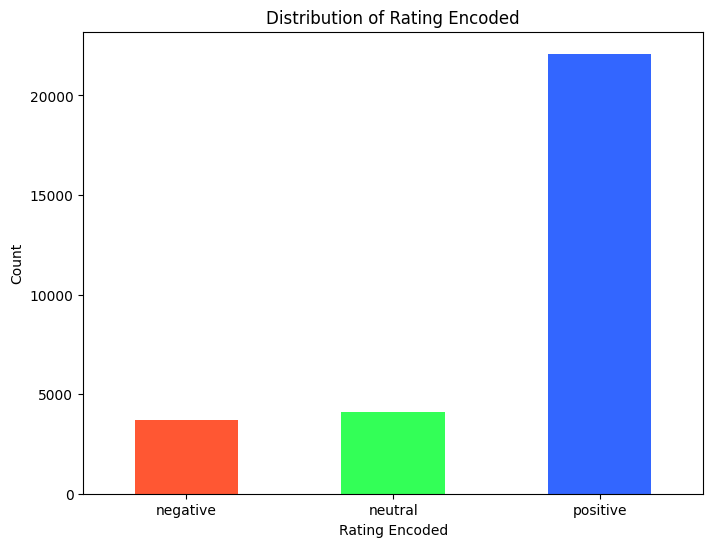

In [102]:
import matplotlib.pyplot as plt

# Plot barplot
plt.figure(figsize=(8, 6))
df_clean['rating_encoded_text'].value_counts().sort_index().plot(kind='bar', color=['#FF5733', '#33FF57', '#3366FF'])
plt.title('Distribution of Rating Encoded')
plt.xlabel('Rating Encoded')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Save the image file
plt.savefig('Distribution of Rating Encoded.png')

plt.show()

Nhận xét: 
- Khách hàng đa số thể hiện cảm xúc của bản thân thông qua những nhà hàng có chất lượng tốt, phục vụ và món ăn đều đạt
- Với lượng rating postive (2) nhiều hơn 20000 chứng tỏ thực khách có xu hướng review tốt các nhà hàng mà họ thích

### 4.4 Biểu đồ bar thể hiện top 10 các nhà hàng theo đặc điểm rating

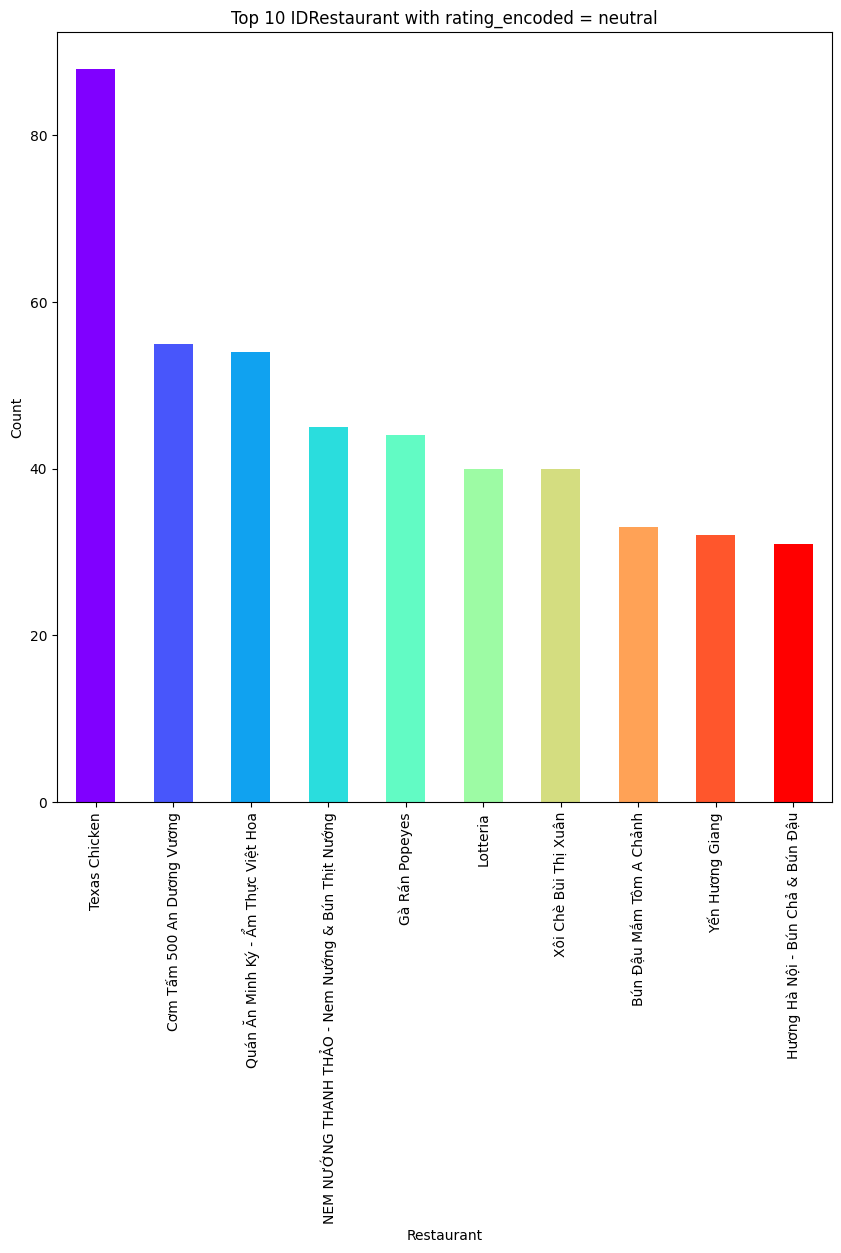

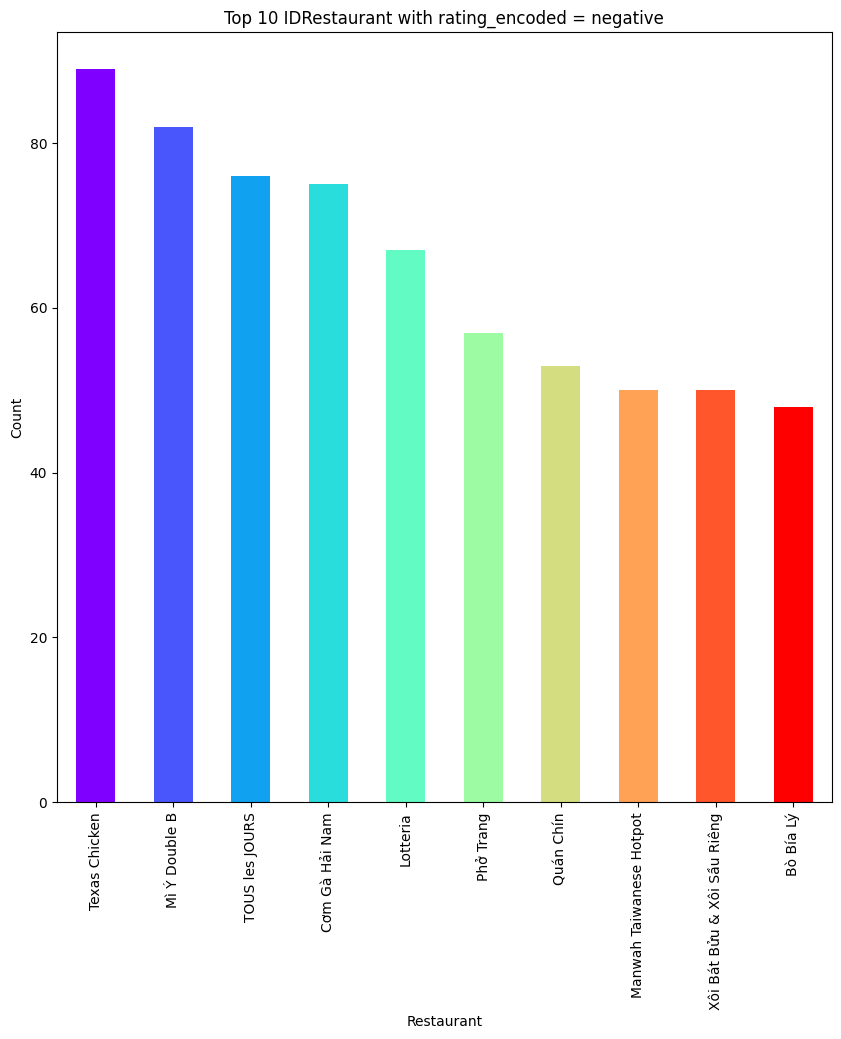

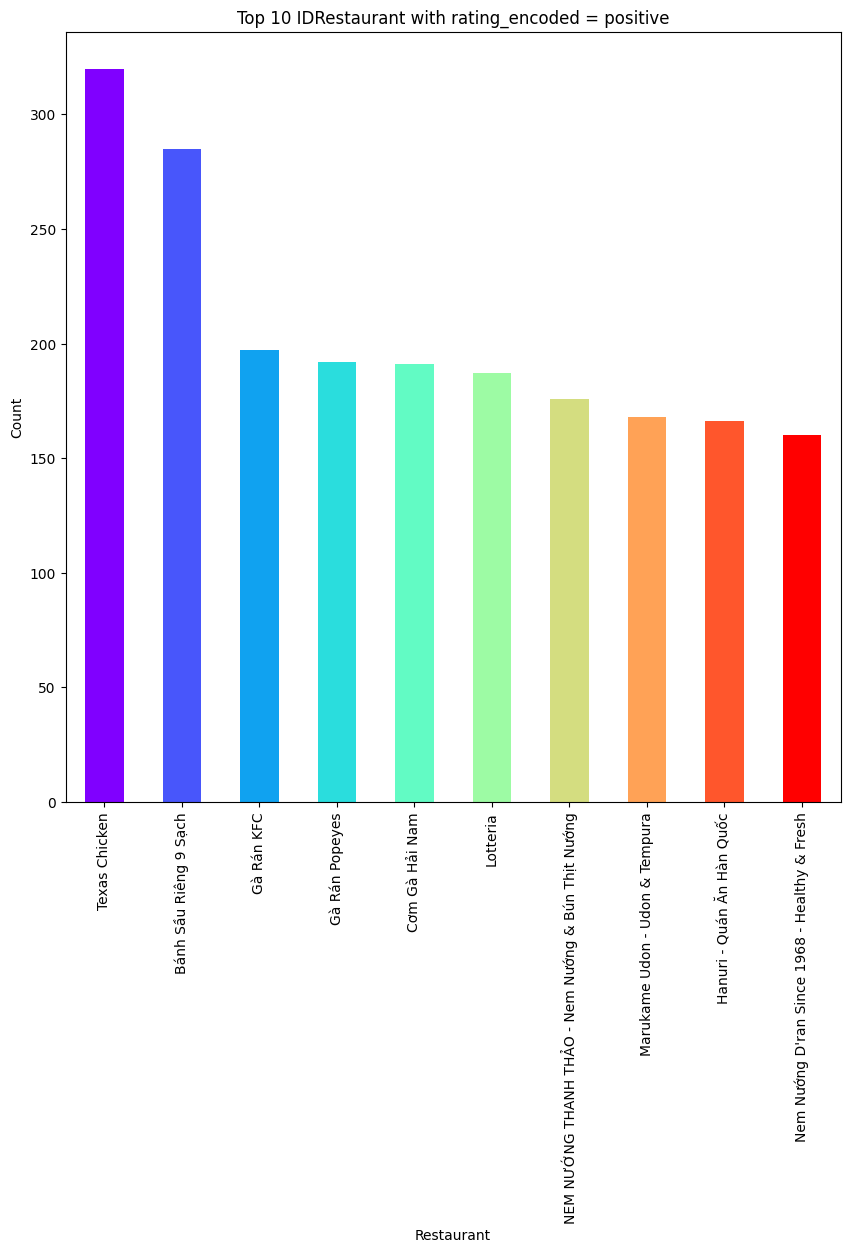

In [103]:
unique_value = df_clean['rating_encoded_text'].unique()

for rating_val in range(len(unique_value)):
    # Filter rows where rating_encoded matches the current value
    filtered_df = df_clean[df_clean['rating_encoded'] == rating_val]

    # Count occurrences of each IDRestaurant
    top_restaurants = filtered_df['Restaurant'].value_counts().head(10)

    # Create a rainbow color palette for each plot
    num_colors = len(top_restaurants)
    rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

    # Plotting the bar chart with colorful bars
    plt.figure(figsize=(10, 10))
    top_restaurants.plot(kind='bar', color=rainbow_colors)
    plt.title(f'Top 10 IDRestaurant with rating_encoded = {unique_value[rating_val]}')
    plt.xlabel('Restaurant')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    # Save the image file
    plt.savefig(f'Top 10 Restaurant with {unique_value[rating_val]} Comments.png')
    
    plt.show()

Nhận xét:
- Những nhà hàng có lượng rating cao như 858, 31 , 506 , ...
- Những nhà hàng có lượng rating trung bình như 1444, 147, 1220, ...
- Nhà hàng có lượng rating thấp : 600, 1169, 1521,...

### 4.5 Biểu đồ boxplot thể hiện tương quan giữa độ dài review và rating

<Figure size 1000x600 with 0 Axes>

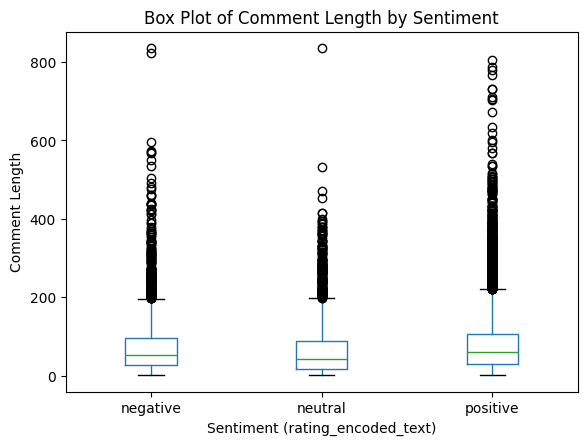

In [104]:
# Calculate the length of each comment
df_clean['Comment_length'] = df_clean['Comment_new'].apply(len)

# Plotting the box plot of comment length by sentiment
plt.figure(figsize=(10, 6))
df_clean.boxplot(column='Comment_length', by='rating_encoded_text', grid=False)
plt.title('Box Plot of Comment Length by Sentiment')
plt.xlabel('Sentiment (rating_encoded_text)')
plt.ylabel('Comment Length')
plt.suptitle('')

# Save the image file
plt.savefig('box_plot_comment_length.png')


plt.show()

#### Nhận xét: 
- Negative:
  Có phạm vi chiều dài rộng hơn, bao gồm cả một số bình luận rất dài.
  
  Có nhiều điểm ngoại lệ (outliers), cho thấy sự biến động lớn về chiều dài bình luận.
  
- Neutral và Postive
  Có phạm vi chiều dài gần nhau, với trung vị (median) tương tự nhau.
  
  Tuy nhiên, tình trạng tích cực có ít điểm ngoại lệ hơn so với tình trạng trung lập.

Nhìn chung, biểu đồ cho thấy sự phân bố của chiều dài bình luận tùy thuộc vào tình trạng cảm xúc. xúc. 

### 4.6 Wordcloud danh sách các từ theo rating

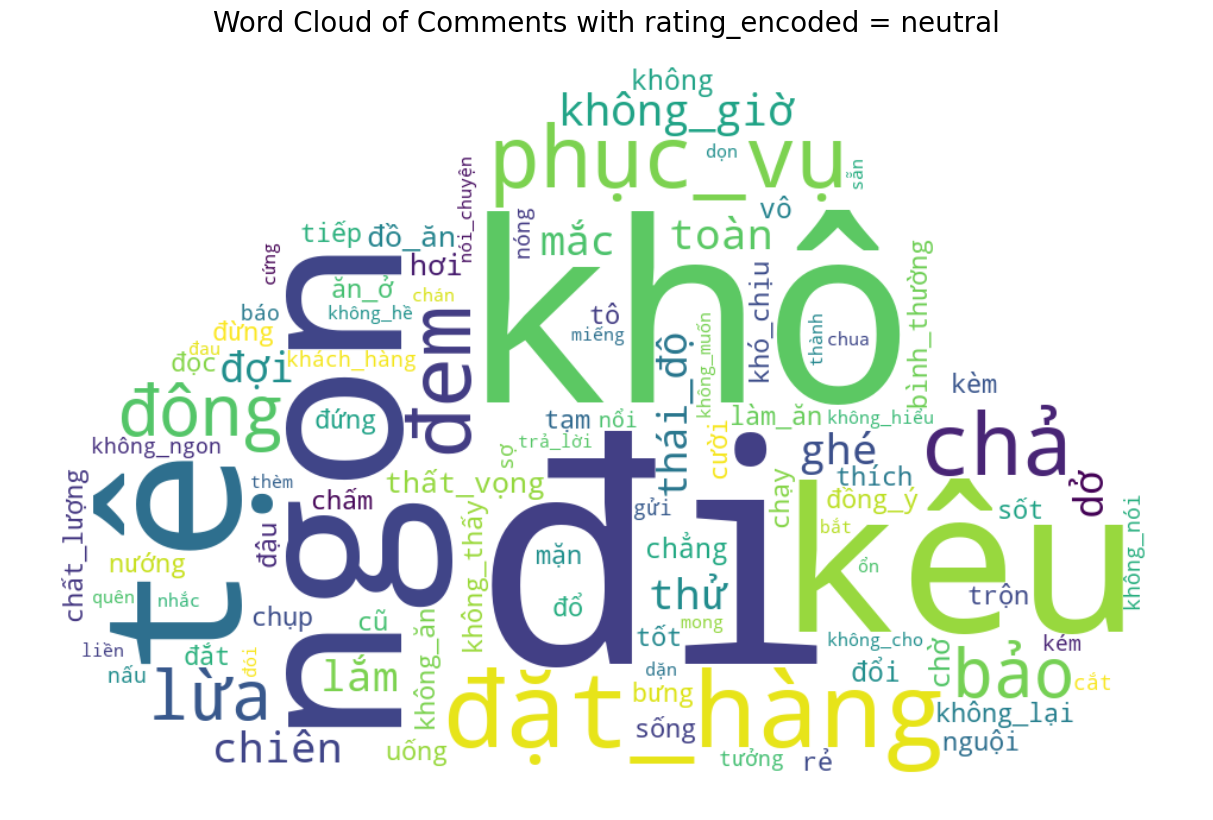

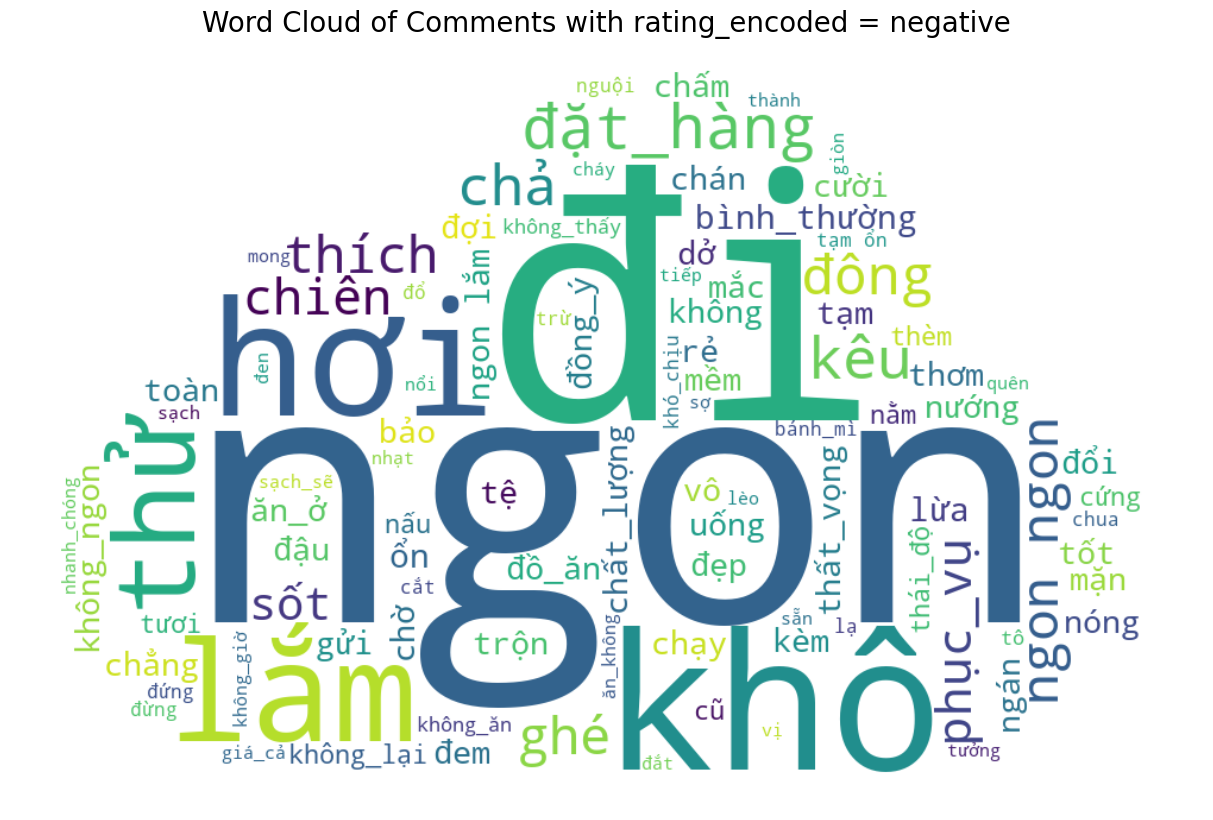

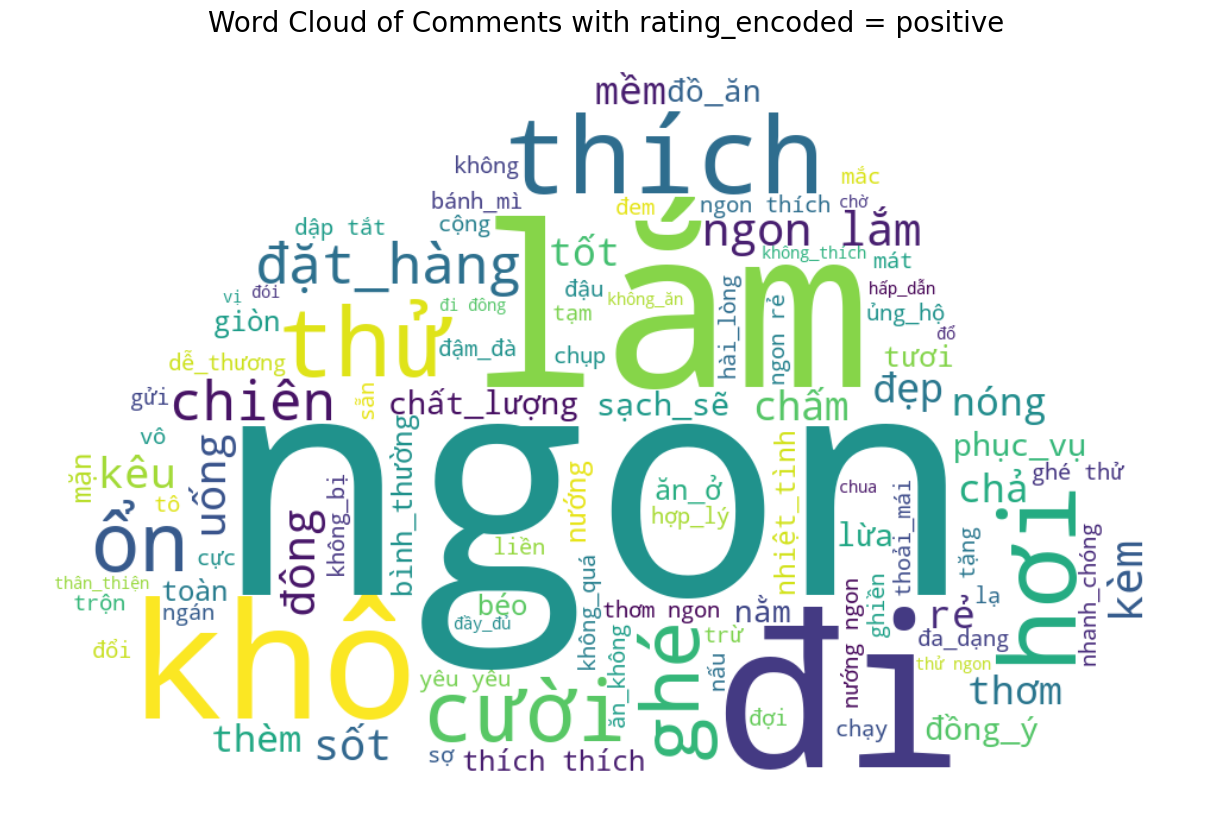

In [105]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

unique_value = df_clean['rating_encoded_text'].unique()
# Set the maximum number of words for the word cloud.
nWords = 100
maskArray = np.array(Image.open("cloud.png"))

for rating_val in range(len(unique_value)):
    # Filter rows where rating_encoded matches the current value
    comments = ' '.join(df_clean[df_clean['rating_encoded'] == rating_val]['Comment_new'])

    # Generate the word cloud with improved clarity
    wordcloud = WordCloud(width=800, height=400, background_color='white', mask=maskArray,max_words=nWords )
    wordcloud.generate(comments)

    # Save img file
    wordcloud.to_file(f'Word Cloud of {unique_value[rating_val]} Comments.png')
    
    # Plot the word cloud
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud of Comments with rating_encoded = {unique_value[rating_val]}', fontsize=20)
    plt.axis('off')
    plt.show()
    


Nhận xét:
- Từ wordcloud cho thấy rằng: đối với những nhà hàng có lượng rating thuộc nhóm 0-negative (tức là 0-4) , các bình luận hay nhận xét đều chung quy về các từ như tệ, lừa, đông ... cho thấy được chất lượng nhà hàng cũng như đồ ăn bên trong nhà hàng đó. Tuy nhiên có một vài từ khẳng định postive nhưu "ngon" chứng tỏ các nhà hàng không phải quá tệ
- Đối với những nhà hàng có lượng rating thuộc nhóm 2-positive (tức là 6-10), ta thấy "ngon", "thích", "thử', "cười" nằm trong nhóm đa số, các nhà hàng này tương ứng có chất lượng phục vụ tốt và đồ ăn ngon.
- Đối với những nhà hàng thuộc mức neutral (4-60) : các nhà hàng tương ứng có các điểm mạnh và yếu bù trừ cho nhau

### 4.7 Wordcloud cho từng restaurant theo yêu cầu của enduser

In [116]:
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1625 non-null   int64 
 1   Restaurant  1625 non-null   object
 2   Address     1625 non-null   object
 3   Time        776 non-null    object
 4   Price       1625 non-null   object
 5   District    1622 non-null   object
dtypes: int64(1), object(5)
memory usage: 76.3+ KB


In [123]:
df_clean

,IDRestaurant,Restaurant,Comment_new,rating_encoded,rating_encoded_text,Comment_length
0,1,Gà Rán & Burger McDonald's Đa Kao,chiên sống,1,neutral,10
1,1,Gà Rán & Burger McDonald's Đa Kao,ngon,1,neutral,4
2,1,Gà Rán & Burger McDonald's Đa Kao,thừa,0,negative,4
3,1,Gà Rán & Burger McDonald's Đa Kao,kêu đói háo_hức thành khóc ròng khóc ròng khóc...,1,neutral,78
4,1,Gà Rán & Burger McDonald's Đa Kao,tặng uống,2,positive,9
...,...,...,...,...,...,...
29912,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa,ngon skdkdjabgkflagshjxjozn bzokzbzjznb đào,2,positive,43
29913,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa,góp,2,positive,3
29914,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa,lừa mong rửa_kỉ điện_thoại đừng phá nuôi lừa c...,0,negative,75
29915,1625,Quán Ăn Minh Ký - Ẩm Thực Việt Hoa,ngon sạch_sẽ,2,positive,12


In [132]:
import seaborn as sns

Hãy nhập thông in IDRestaurant: 1


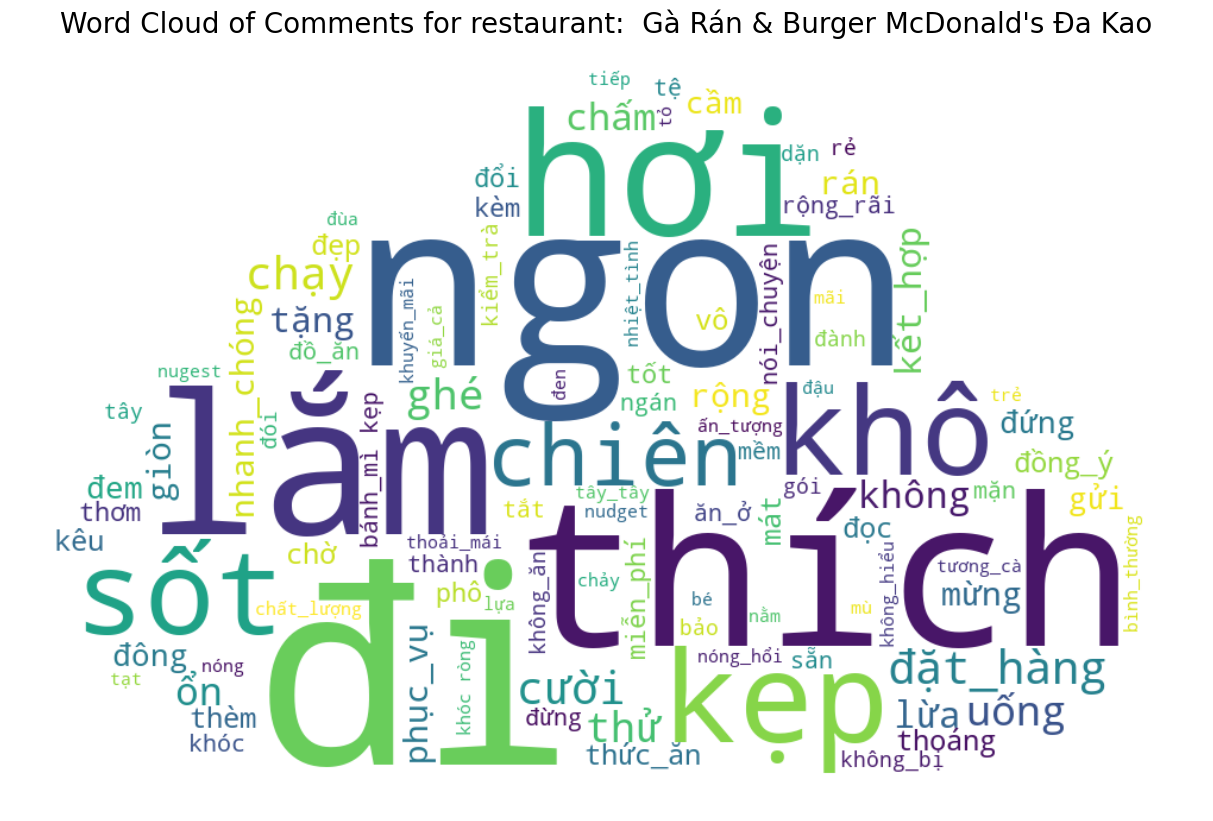

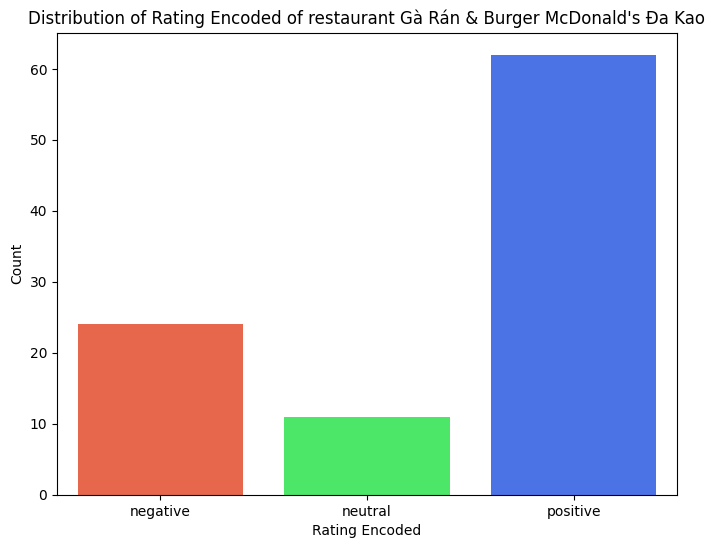

In [133]:
restaurant_id = int(input("Hãy nhập thông in IDRestaurant: "))
restaurant_name = df_restaurant.loc[df_restaurant['ID'] == restaurant_id, "Restaurant"].values[0]
# Filter rows where rating_encoded matches the current value
comments = ' '.join(df_clean[df_clean['IDRestaurant'] == restaurant_id]['Comment_new'])

# Generate the word cloud with improved clarity
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=maskArray,max_words=nWords )
wordcloud.generate(comments)


# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud of Comments for restaurant:  {restaurant_name}', fontsize=20)
plt.axis('off')


# Plot barplot with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=df_clean.loc[df_clean["IDRestaurant"]== restaurant_id, 'rating_encoded_text'].value_counts().sort_index().index,
            y=df_clean.loc[df_clean["IDRestaurant"]== restaurant_id, 'rating_encoded_text'].value_counts().sort_index().values,
            palette=['#FF5733', '#33FF57', '#3366FF'])
plt.title(f'Distribution of Rating Encoded of restaurant {restaurant_name}')
plt.xlabel('Rating Encoded')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()